In [ ]:
import pyinsurance
from pyinsurance.pymolder import tipp_model
from pyinsurance.data.IRX import load as d1
from pyinsurance.data.sp500 import load as d2
from pyinsurance.Metric_Generator.returns_metrics import Cumulative_ret
import matplotlib.pyplot as plt 

risk_Asset = d2()
safe_Asset = d1()/52


In [ ]:
lock_in_rate = 0.05
mcr = 0.40
tfci = 0.80
fund = 100
floor = 0.80
multiplier = 10
Benchmark_return = risk_Asset
Rebalancement_frequency = 52 # once a week -> 52 weeks a year

In [ ]:
res = tipp_model(risk_Asset,safe_Asset,lock_in_rate,mcr,tfci,fund,\
                floor,multiplier,risk_Asset,Rebalancement_frequency)

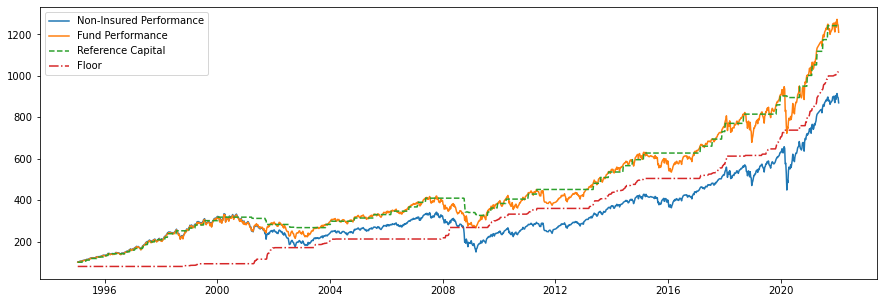

In [26]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(111)
plt.plot(risk_Asset.index,Cumulative_ret(risk_Asset)*100,label = 'Non-Insured Performance')
plt.plot(risk_Asset.index,res.Fund,label = 'Fund Performance')
plt.plot(risk_Asset.index,res.Reference_capital,label = 'Reference Capital',linestyle="--")
plt.plot(risk_Asset.index,res.floor,label = 'Floor',linestyle="-.")
plt.legend()
plt.show()

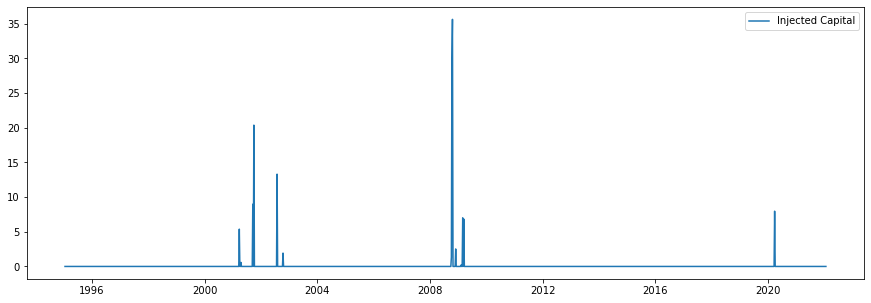

In [27]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
plt.plot(risk_Asset.index,res.capital_reinjection,label = 'Injected Capital')
plt.legend()
plt.show()

Let's try to evaluate our Value-at-Risk

In [44]:
import pyvar
data = res.return_mtx * 100
VaR, CVaR = varpy.EVT_VaR(data, 0.05, 7)
print(VaR, CVaR )

-4.293249013491374 -5.826878472310158


In [47]:
from varpy.Backtester.bktst import Backtest
from varpy.Backtester.time_Significance import Testing
VaR , CVaR = Backtest(data, 500, 2, 0.05, model = 'EVT')
ts = Testing(data,VaR,CVaR,500,0.05)
print(ts.summary)


Outputs                       Statistics
--------------------------  ------------
Number of VaR Violations:       31
Number of CVaR Violations:      13
Christophersen Test:            -1.331
Prob (Z-statistic):              0.05159
Quantile ratio:                  1.31261
Kupiec Test:                     4.214
TUFF Test:                       6.709
Hass Test:                      33.861


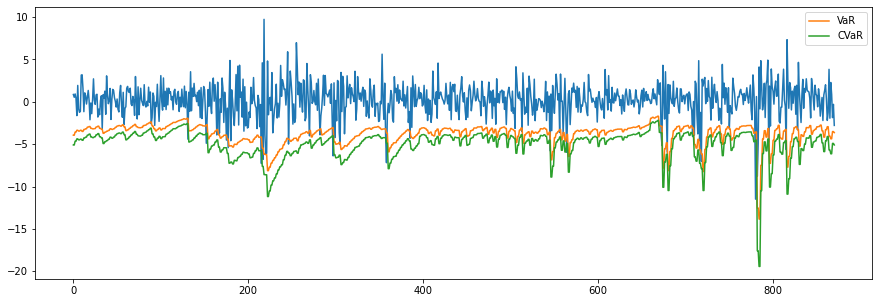

In [48]:
fig = plt.figure(figsize=(15,5))
plt.plot(data[500:])
plt.plot(VaR, label = 'VaR')
plt.plot(CVaR, label = 'CVaR')
plt.legend()
plt.show()